In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/airbnb_project/airbnb_nlp/")

In [ ]:
df1 = pd.read_csv('reviews_summary.csv')

In [ ]:
df1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
3,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
4,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269063 entries, 0 to 1269062
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1269063 non-null  int64 
 1   id             1269063 non-null  int64 
 2   date           1269063 non-null  object
 3   reviewer_id    1269063 non-null  int64 
 4   reviewer_name  1269063 non-null  object
 5   comments       1268544 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.1+ MB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2 = pd.read_csv('listings_summary.csv')

In [ ]:
df2.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20201012032825,2020-10-19,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",a few days or more,0%,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86993,2.36251,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Hangers"", ""Iron"", ""Laptop-friendly workspace...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,17,47,321,2020-10-19,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,1,0,0,0.05
1,3109,https://www.airbnb.com/rooms/3109,20201012032825,2020-10-18,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,within a day,100%,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83349,2.31852,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Smart lock"", ""Luggage dropoff allowed"", ""Lap...",$60.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,365,2020-10-18,9,1,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.19
2,4886,https://www.airbnb.com/rooms/4886,20201012032825,2020-10-18,Country-Style Studio Hip Area FREE CRUISE & WIFI,Bright and Cozy Studio Apartment for 2 Guests...,2 Free River Cruise Tix with your booking ! M...,https://a0.muscache.com/pictures/395578/e7f46d...,6792,https://www.airbnb.com/users/show/6792,Ryan Of Cobblestone,2009-01-16,"Paris, Île-de-France, France",I am the owner of Cobblestone Paris Rentals\r\...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/6792/profile_...,https://a0.muscache.com/im/users/6792/profile_...,République,9.0,9.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Paris, Ile-de-France, France",Popincourt,NaN,48.86528,2.37115,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,2.0,"[""Cable TV"", ""Laptop-friendly workspace"", ""Hai...",$89.00,3,120,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,2020-10-18,25,0,0,2009-09-05,2019-05-06,90.0,9.0,10.0,9.0,9.0,10.0,9.0,7511101570436,f,11,11,0,0,0.18
3,4890,https://ww

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66334 entries, 0 to 66333
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            66334 non-null  int64  
 1   listing_url                                   66334 non-null  object 
 2   scrape_id                                     66334 non-null  int64  
 3   last_scraped                                  66334 non-null  object 
 4   name                                          66270 non-null  object 
 5   description                                   64989 non-null  object 
 6   neighborhood_overview                         40213 non-null  object 
 7   picture_url                                   66333 non-null  object 
 8   host_id                                       66334 non-null  int64  
 9   host_url                                      66334 non-null 

In [ ]:
df2.duplicated().sum()

0

In [ ]:
# merging full df_1 + add only specific columns from df_2
df = pd.merge(df1, df2[['host_neighbourhood', 'host_id', 'latitude',
                          'longitude', 'number_of_reviews', 'id', 'property_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'host_neighbourhood':'neighbourhood'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)

In [ ]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,host_id,latitude,longitude,number_of_reviews,property_type
0,2577,366217274,2019-01-02,28047930,Kate,Beautiful apartment in a really handy location...,République,2827,48.86993,2.36251,1,Entire loft
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...,Alésia,3631,48.83349,2.31852,9,Entire apartment
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...,Alésia,3631,48.83349,2.31852,9,Entire apartment
3,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG,Alésia,3631,48.83349,2.31852,9,Entire apartment
4,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...,Alésia,3631,48.83349,2.31852,9,Entire apartment


In [ ]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 1269063 rows and 12 columns.


Hosts with many properties

In [ ]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(df.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,listing_id
host_id,
6053288,251
7642792,135
50978178,119
2667370,116
33889201,105
17037121,98
56333610,93
21630783,80
2107478,75


Let's take a closer look at the top 3 hosts. How many properties do they have in the different areas? And are these private apartments, or something else, like a hostel?

**1st Host**

In [ ]:
top1_host = df.host_id == 6053288
df[top1_host].neighbourhood.value_counts()
pd.DataFrame(df[top1_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Saint-Michel,251


In [ ]:
pd.DataFrame(df[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire apartment,251


**2nd Host**

In [ ]:
top2_host = df.host_id == 7642792
df[top2_host].neighbourhood.value_counts()

pd.DataFrame(df[top2_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Le Marais,135


In [ ]:
pd.DataFrame(df[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire apartment,133
Entire place,2


**3rd Host**

In [ ]:
top3_host = df.host_id == 50978178
df[top3_host].neighbourhood.value_counts()

pd.DataFrame(df[top3_host].groupby('neighbourhood')['listing_id'].nunique())

,listing_id
neighbourhood,
Châtelet - Les Halles - Beaubourg,119


In [ ]:
pd.DataFrame(df[top3_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire apartment,119


## **2. Preprocessing the Data**

### **2.1. missing values**

In [ ]:
df.isna().sum()

listing_id                0
id                        0
date                      0
reviewer_id               0
reviewer_name             0
comments                519
neighbourhood        155712
host_id                   0
latitude                  0
longitude                 0
number_of_reviews         0
property_type             0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

listing_id           0
id                   0
date                 0
reviewer_id          0
reviewer_name        0
comments             0
neighbourhood        0
host_id              0
latitude             0
longitude            0
number_of_reviews    0
property_type        0
dtype: int64

In [ ]:
df.shape

(1112930, 12)

### **2.2. Language detection**

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 4.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=d29454821a831dccf68b2b1f17cedf41593e1ebbaf93e10d7e95f04ec9d6b526
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
# we use Python's langdetect 
from langdetect import detect

In [ ]:
# function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [ ]:
%%time
df['language'] = df['comments'].apply(language_detection)

CPU times: user 1h 20min 22s, sys: 54.4 s, total: 1h 21min 16s
Wall time: 1h 21min 20s


In [4]:
# write the dataframe to a csv file in order to avoid the long runtime
#df.to_csv('processed_df.csv', index=False)
df = pd.read_csv('processed_df.csv')

In [5]:
df.language.value_counts().head(10)


en       681729
fr       289626
es        45350
de        18885
ko        14744
it        14572
pt        11534
ru         7233
zh-cn      6863
nl         5057
Name: language, dtype: int64

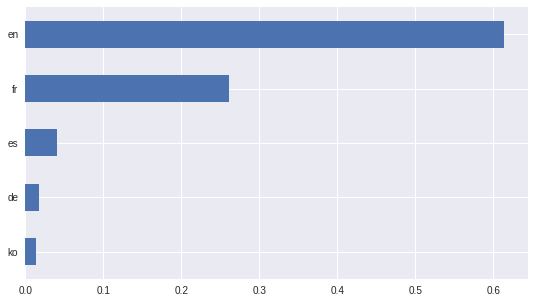

In [6]:
# visualizing the comments' languages a) quick and dirty
ax = df.language.value_counts(normalize=True).head(5).sort_values().plot(kind='barh', figsize=(9,5));

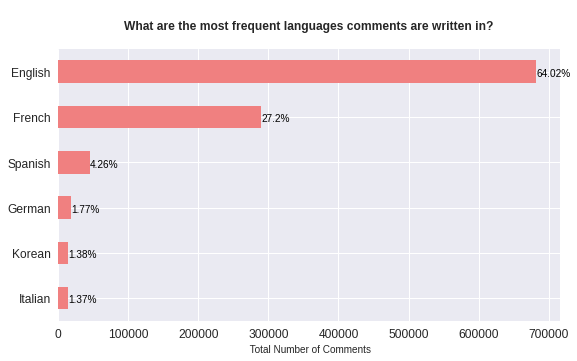

In [7]:
# visualizing the comments' languages b) neat and clean
ax = df.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Spanish', 'German', 'Korean', 'Italian'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

In [8]:
# splitting the dataframes in language related sub-dataframes
df_en = df[(df['language']=='en')]
df_fr  = df[(df['language']=='fr')]
df_es  = df[(df['language']=='es')]

## **3. Visualizing the Data with WordClouds**

In [12]:
# import necessary libraries
import nltk
#from nltk.corpus import stopwords
#from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [13]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

#### **English wordcloud**

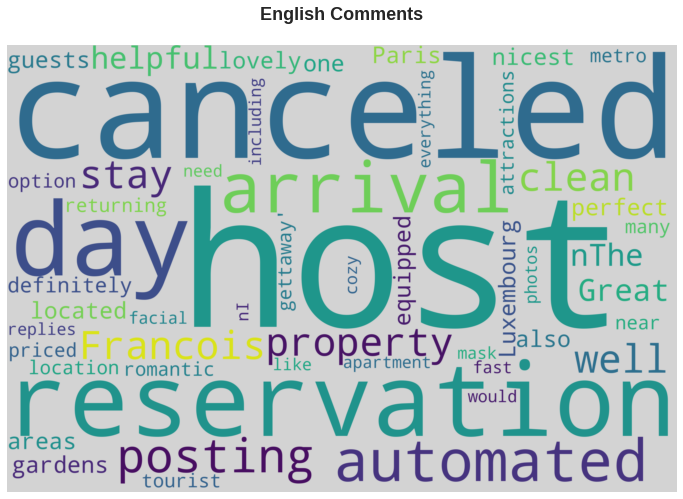

In [14]:
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_en.comments.values))

plot_wordcloud(wordcloud, 'English')

#### **French wordcloud**

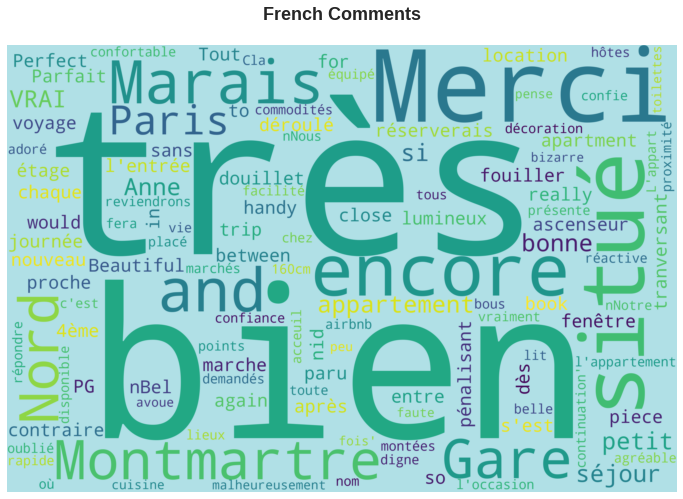

In [15]:
wordcloud = WordCloud(max_font_size=None, max_words=150, background_color="powderblue",
                      width=3000, height=2000,
                      stopwords=stopwords.words('french')).generate(str(df_fr.comments.values))

plot_wordcloud(wordcloud, 'French')


#### **Spanish wordcloud**

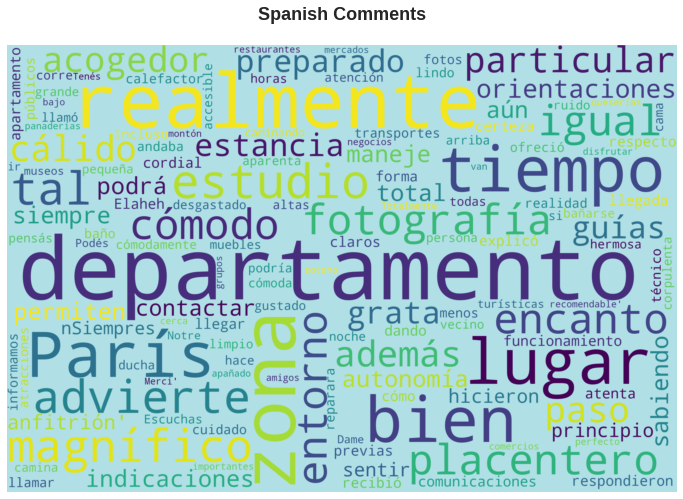

In [16]:
wordcloud = WordCloud(max_font_size=None, max_words=150, background_color="powderblue",
                      width=3000, height=2000,
                      stopwords=stopwords.words('spanish')).generate(str(df_es.comments.values))

plot_wordcloud(wordcloud, 'Spanish')


## **4. Sentiment Analysis**

#### **4.1. VADER package**

In [18]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
# assign it to another name to make it easier to use
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as positive or negative, and in many cases, how positive or negative.
Let's play around a bit and get familiar with this package:

In [22]:
print_sentiment_scores("This raspberry cake is good.")

This raspberry cake is good.------------ {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}


VADER produces four sentiment metrics from these word ratings, which we can see above. The first three - positive, neutral and negative - represent the proportion of the text that falls into those categories. As we can see, our example sentence was rated as 42% positive, 58% neutral, and 0% negative.

The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1. In this case, our example sentence has a rating of 0.44, which is pretty neutral.


In [25]:
print_sentiment_scores("This raspberry cake is good.")
print_sentiment_scores("This raspberry cake is GOOD!")
print_sentiment_scores("This raspberry cake is VERY GOOD!!")
print_sentiment_scores("This raspberry cake is really GOOD! But the coffee is dreadful.")

This raspberry cake is good.------------ {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}
This raspberry cake is GOOD!------------ {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.6027}
This raspberry cake is VERY GOOD!!------ {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.7386}
This raspberry cake is really GOOD! But the coffee is dreadful. {'neg': 0.18, 'neu': 0.558, 'pos': 0.262, 'compound': 0.3222}


In [26]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [27]:
negative_score("The food is really GOOD! But the service is dreadful.")

0.192

In [28]:
neutral_score("The food is really GOOD! But the service is dreadful.")

0.529

In [29]:
positive_score("The food is really GOOD! But the service is dreadful.")

0.279

In [30]:
compound_score("The food is really GOOD! But the service is dreadful.")

0.3222

#### **4.2. Calculating Sentiment Scores**

Let's now have VADER produce all four scores for each of our English-language comments. As this takes roughly a quarter of an hour, it's a good idea to save the dataframe.

In [32]:
%%time

df_en['sentiment_neg'] = df_en['comments'].apply(negative_score)
df_en['sentiment_neu'] = df_en['comments'].apply(neutral_score)
df_en['sentiment_pos'] = df_en['comments'].apply(positive_score)
df_en['sentiment_compound'] = df_en['comments'].apply(compound_score)

CPU times: user 28min 29s, sys: 26.5 s, total: 28min 55s
Wall time: 28min 56s


In [33]:
# write the dataframe to a csv file in order to avoid the long runtime
df_en.to_csv('sentiment_df_eng.csv', index=False)
#df = pd.read_csv('data/sentimentData/sentiment_df_eng')
df = df_en

In [36]:
df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood,host_id,latitude,longitude,number_of_reviews,property_type,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
1,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...,Alésia,3631,48.83349,2.31852,9,Entire apartment,en,0.0,1.0,0.0,0.0
2,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...,Alésia,3631,48.83349,2.31852,9,Entire apartment,en,0.0,1.0,0.0,0.0


Let's investigate the distribution of all scores:

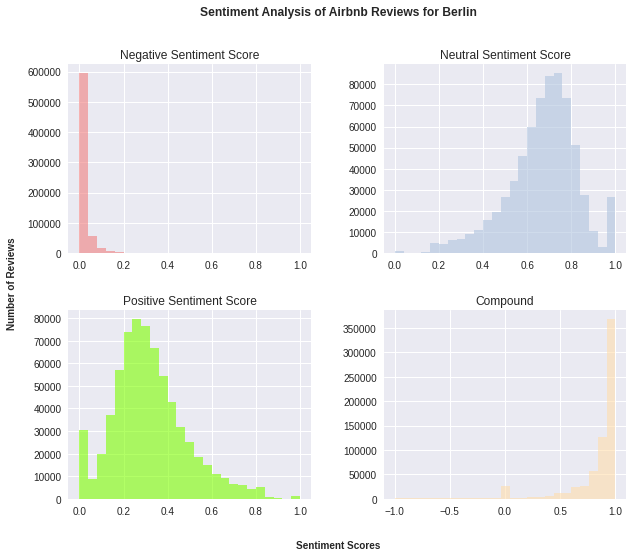

In [37]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Berlin\n\n', fontsize=12, fontweight='bold');

VADER produces four sentiment metrics from these word ratings. The first three - positive, neutral and negative - represent the proportion of the text that falls into those categories. The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardized to range between -1 and 1.

Finally, let’s use the method described to generate descriptive statistics that summarize the central tendency and dispersion of our dataset's compound score:

In [73]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    681729.000000
mean          0.822060
std           0.284039
min          -0.998600
5%            0.000000
10%           0.556300
20%           0.777500
30%           0.856100
40%           0.902000
50%           0.929400
60%           0.948500
70%           0.962700
80%           0.974100
90%           0.984200
max           0.999700
Name: sentiment_compound, dtype: float64

#### **4.3. Comparing Negative and Positive Comments**

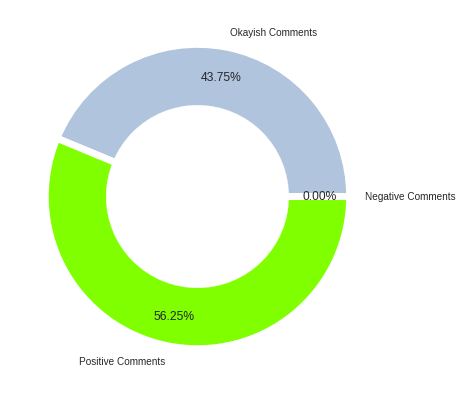

In [86]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

Clearly, the bulk of the reviews are tremendously positive. Wouldn't it be interesting to know what the negative and positive comments are about? Let's have a look:

In [76]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [77]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

In [78]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

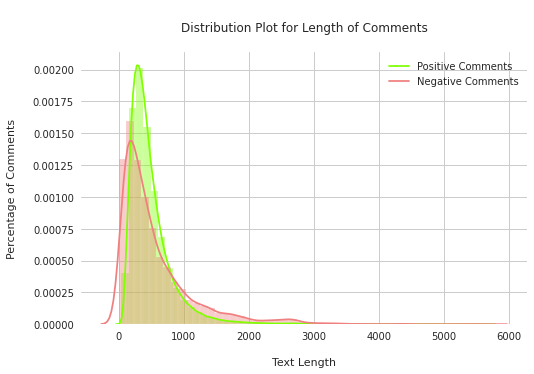

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

The mode for the text length of positive comments can be found more to the right than for the negative comments, which means most of the positive comments are longer than most of the negative comments. But the tail for negative comments is thicker.

In [80]:
# read some positive comments
pos_comments[10:15]

['Our recent stay in Paris was made all the more enjoyable by staying with Jennifer at her Marais apartment. Before we arrived dealing with her was very easy, she responded promptly and once booked provided detailed information for us, including information which made our arrival and check in very easy.  Being new to using this service, this gave us confidence about how our stay was going to go.\r\n\r\nThe apartment is exactly as was depicted, cute, charming and in a great location. A booklet with all the info we could need was provided with a bottle of wine and chocolate to get us going. Its the little touches in this place that make your stay much more enjoyable.\r\n\r\nWe plan on visiting Paris quite often, and we will certainly stay with Jennifer again.',
 'All we can say is wow! We stayed here for a week as part of our honeymoon and it was simply fantastic, such a nice space. We especially loved the high ceilings with the exposed beams. Our greeter was lovely, she met us on time a

In [81]:
# read some negative comments
neg_comments[10:15]

["Communiction with Mathieu was easy and friendly.  We arrived very late and it was no problem. We never met him, but his neighbor was there to hand the keys.  \r\nWe were 5 adults, so extra beds were put in the apartment. To do that they had to move furniture around, which made the apartment look very stuffed and messy.  It's frankly to small for 5.  The extra beds were sofa-bad, which were broken and uncomfortable.  I would only advise this place for 2, max 3 people.\r\nWell situated, but dodgy neighborhood at night.   We only received one set of keys, which as not convenient for the 5 of us.",
 'We were a family of 7 (5 children) when we stayed in this place. It took us all with no issues. Centrally located, charming & cozy, close to a neighborhood public park, grocety, restaurants, & underground metro stations. All walkable. However, if you have heavy luggages or have bad knees, this place is not for you; it is on the 3rd floor with no lift.',
 'The apartment looks a lot more nicer

Let's quickly check if a scatter plot may reveal some differences in the comments' sentiment with respect to the districts:

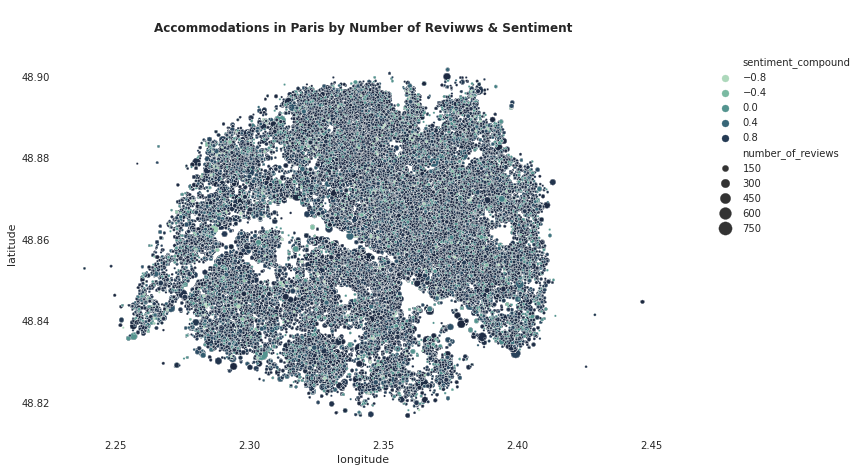

In [82]:
sns.set_style("white")
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x="longitude", y="latitude", size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Paris by Number of Reviwws & Sentiment\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### **4.4. Investigating Positive Comments**

##### **WordCloud**

After reading some of these reviews to get a feeling for what visitors applaud or complain about, WordClouds are a great tool to help us peek behind the curtain:

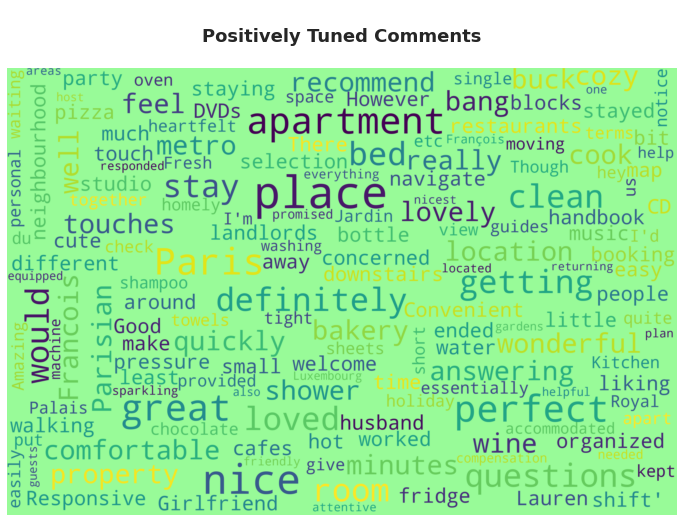

In [83]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="palegreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

##### **Frequency Distribution**

Another method for visually exploring text is with frequency distributions. In the context of a text corpus, such a distribution tells us the prevalence of certain words. Here we use the Yellowbrick library.


In [84]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

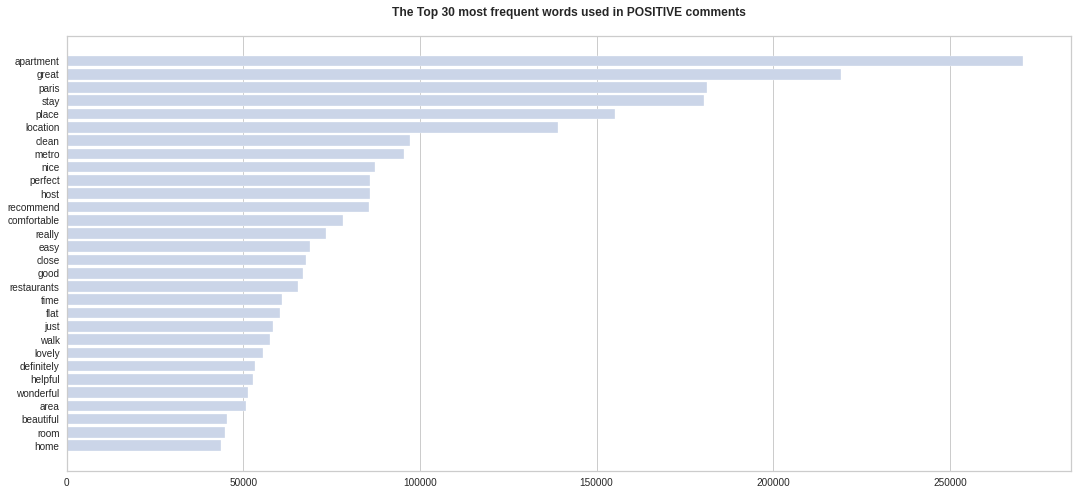

In [85]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;